In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn

In [21]:
email_df = pd.read_csv('spam_ham_dataset.csv')
email_df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [22]:
email_df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [23]:
X, Y = email_df.text, email_df.label
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2)

In [24]:
vectorizer = CountVectorizer()
count = vectorizer.fit_transform(x_train.values)
count

<4136x44756 sparse matrix of type '<class 'numpy.int64'>'
	with 365631 stored elements in Compressed Sparse Row format>

In [25]:
clf = MultinomialNB()
targets = y_train.values
clf.fit(count, targets)
y_predict = clf.predict(vectorizer.transform(x_test))
y_predict

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [26]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[727,  12],
       [ 12, 284]], dtype=int64)

Text(33.0, 0.5, 'Truth')

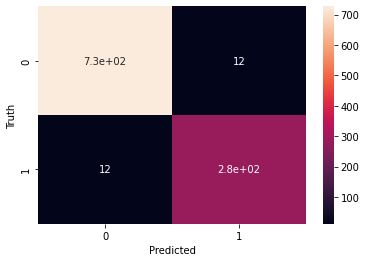

In [27]:
sn.heatmap(cm,annot=True) 
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
accuracy_score(y_test, y_predict)

0.9768115942028985